# 🍷 Challenge 1: Wine Quality Prediction AI Project - Educational Notebook

## 🎯 Theme: AI for Quality Assessment and Decision-Making in Agriculture and Food Industry

Welcome to Challenge 1! You'll build an intelligent wine quality prediction system that helps wineries maintain consistent quality standards and optimize their production processes. This challenge explores how AI can augment human expertise in specialized domains while understanding the complex relationships between chemical properties and wine quality.

## 📖 What You'll Learn
- **Regression vs Classification**: Build models for both numerical scores and categorical predictions
- **Feature Engineering**: Understand relationships between chemical properties
- **Exploratory Data Analysis**: Discover patterns in wine chemistry data
- **Model Evaluation**: Compare different algorithms and interpret performance
- **Imbalanced Data Handling**: Work with realistic quality distributions
- **Domain Knowledge Integration**: Combine AI with expert wine knowledge

## 🗂️ Dataset Overview
You'll work with a real wine quality dataset containing:
- **Chemical Properties**: 11 physicochemical features (acidity, sugar, alcohol, etc.)
- **Wine Types**: Red and white wine samples
- **Quality Scores**: Expert ratings from 4-6 scale
- **Quality Categories**: Poor, Average, and Good classifications

**Real-World Impact**: This system could help wineries:
- Automate quality control processes
- Reduce dependence on expensive expert tasters
- Maintain consistent quality standards
- Optimize production parameters for better quality

## 🚀 Challenge Roadmap
Follow these steps to build your wine quality predictor:

1. **📊 Data Exploration**: Understand wine chemistry and quality distributions
2. **🔬 Chemical Analysis**: Analyze relationships between chemical properties
3. **📈 Feature Engineering**: Create meaningful features from chemical data
4. **🤖 Model Building**: Build both regression and classification models
5. **📊 Model Evaluation**: Compare algorithms and interpret performance
6. **🎯 Business Insights**: Extract actionable insights for winemakers
7. **💭 Ethical Considerations**: Consider AI's role in traditional industries

---

## 💡 **Key Insight**: 
Wine quality prediction isn't just about accuracy - it's about creating interpretable models that complement human expertise and respect traditional wine-making knowledge while providing objective, consistent quality assessment.

---

Let's start our wine quality prediction journey! 🍷

### Task 1: Load and Explore the Wine Quality Dataset

**🎯 Goal**: Understand your wine dataset and the chemistry behind wine quality

**📝 What to do**:
- Load the wine quality dataset
- Examine the structure and understand each chemical property
- Analyze quality distributions and wine type differences
- Visualize key relationships between features

**💡 Key Questions to Consider**:
- What chemical properties are most important for wine quality?
- How are red and white wines different in their chemical composition?
- What's the distribution of quality scores in our dataset?
- Are there any missing values or data quality issues?

Let's start by importing the necessary libraries and loading our dataset:

In [1]:
# Import essential libraries for data analysis and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

print("📚 Libraries imported successfully!")
print("🍷 Ready to analyze wine quality data!")

📚 Libraries imported successfully!
🍷 Ready to analyze wine quality data!


In [ ]:
# Load the wine quality dataset
print("🍷 Loading wine quality dataset...")

# Primary method: Download from GitHub (works in both Colab and local environments)
github_url = "https://raw.githubusercontent.com/BridgingAISocietySummerSchools/Coding-Project/main/challenge_1/data/WineQT.csv"

try:
    # Try loading from GitHub first (recommended for Colab)
    df = pd.read_csv(github_url)
    print("✅ Loaded from GitHub repository")
except Exception as e:
    print(f"⚠️ GitHub download failed: {e}")
    
    # Fallback: Try local file system
    try:
        df = pd.read_csv('../data/WineQT.csv')
        print("✅ Loaded from local file system")
    except FileNotFoundError:
        print("❌ Local file not found either.")
        print("\n📋 Alternative options for Google Colab:")
        print("Option 1: Upload file directly")
        print("  from google.colab import files")
        print("  uploaded = files.upload()")
        print("  df = pd.read_csv('WineQT.csv')")
        print("\nOption 2: Mount Google Drive")
        print("  from google.colab import drive")
        print("  drive.mount('/content/drive')")
        print("  df = pd.read_csv('/content/drive/MyDrive/path/to/WineQT.csv')")
        raise

# Display basic information about the dataset
print(f"📊 Dataset Shape: {df.shape}")
print(f"📋 Columns: {list(df.columns)}")
print("\n" + "="*50)
print("🔍 DATASET OVERVIEW")
print("="*50)

# Show first few rows
print("\n📋 First 5 wine samples:")
display(df.head())

# Dataset info
print("\n📊 Dataset Information:")
print(df.info())

# Statistical summary
print("\n📈 Statistical Summary:")
display(df.describe())

# Check for missing values
print(f"\n❓ Missing values: {df.isnull().sum().sum()}")

print("\n✅ Wine quality dataset loaded successfully!")
print(f"🍷 Ready to analyze {len(df)} wine samples!")

🍷 Loading wine quality dataset...
✅ Loaded from GitHub repository
📊 Dataset Shape: (1143, 13)
📋 Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']

🔍 DATASET OVERVIEW

📋 First 5 wine samples:
✅ Loaded from GitHub repository
📊 Dataset Shape: (1143, 13)
📋 Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'Id']

🔍 DATASET OVERVIEW

📋 First 5 wine samples:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4



📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None

📈 Statistical Summary:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000



❓ Missing values: 0

✅ Wine quality dataset loaded successfully!
🍷 Ready to analyze 1143 wine samples!


### Task 2: Chemical Properties Analysis

**🎯 Goal**: Understand the chemistry behind wine quality

**📝 What to do**:
- Analyze each chemical property and its role in wine quality
- Explore correlations between different chemical features
- Understand the distribution of each chemical property
- Identify potential outliers or unusual patterns

**🧪 Wine Chemistry Guide**:
- **Fixed Acidity**: Tartaric acid (affects taste and preservation)
- **Volatile Acidity**: Acetic acid (vinegar taste in high amounts)
- **Citric Acid**: Adds freshness and flavor complexity
- **Residual Sugar**: Sweetness level after fermentation
- **Chlorides**: Salt concentration (affects taste balance)
- **Sulfur Dioxide**: Preservative preventing microbial growth
- **Density**: Related to alcohol and sugar content
- **pH**: Acidity level affecting taste and stability
- **Sulphates**: Antioxidant and preservative
- **Alcohol**: Alcohol percentage by volume

Let's dive into the chemistry! 🧪

🎯 WINE QUALITY ANALYSIS

📊 Quality Score Distribution:
Quality 3: 6 wines (0.5%)
Quality 4: 33 wines (2.9%)
Quality 5: 483 wines (42.3%)
Quality 6: 462 wines (40.4%)
Quality 7: 143 wines (12.5%)
Quality 8: 16 wines (1.4%)

📋 Quality Category Distribution:
Good: 621 wines (54.3%)
Average: 483 wines (42.3%)
Poor: 39 wines (3.4%)


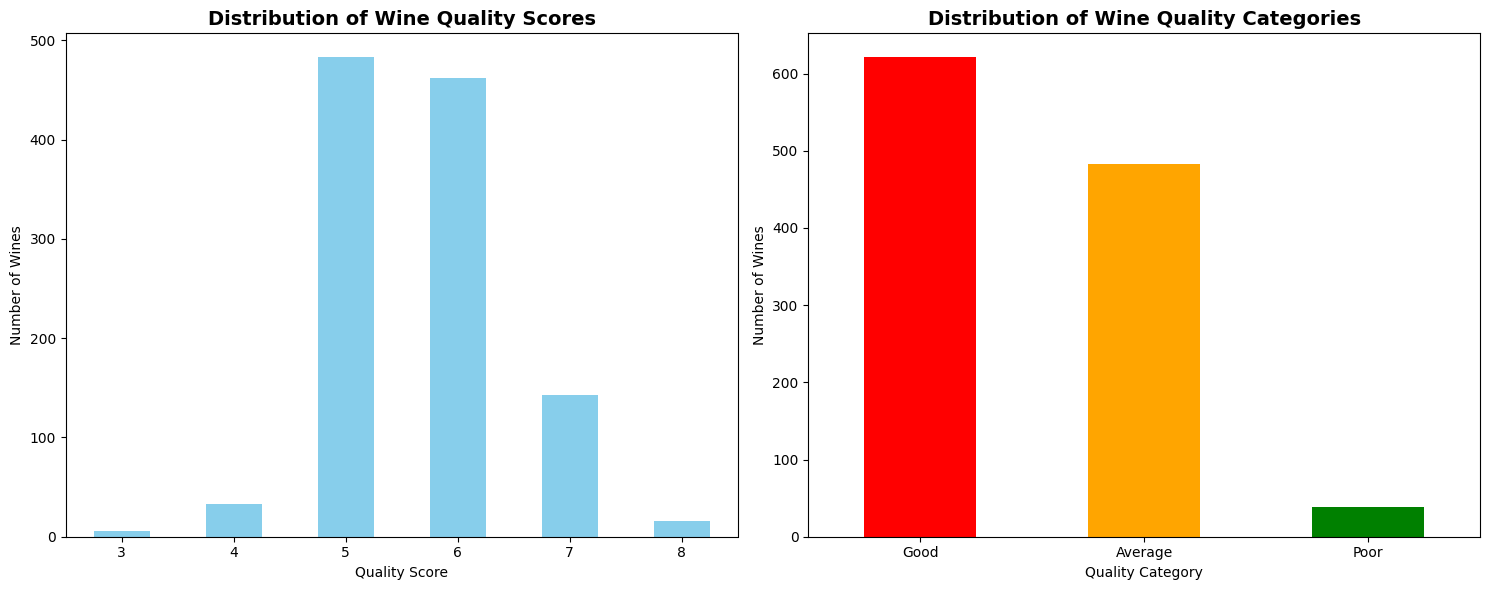


💡 Key Insights:
• Most wines are of average quality (typical in real-world scenarios)
• Very few wines achieve 'Good' quality rating (premium wines are rare)
• This represents a realistic, imbalanced dataset challenge


In [5]:
# Create quality categories for better analysis
def categorize_quality(quality):
    if quality <= 4:
        return 'Poor'
    elif quality <= 5:
        return 'Average'
    else:
        return 'Good'

df['quality_category'] = df['quality'].apply(categorize_quality)

# Analyze quality distribution
print("🎯 WINE QUALITY ANALYSIS")
print("="*40)

print("\n📊 Quality Score Distribution:")
quality_counts = df['quality'].value_counts().sort_index()
for quality, count in quality_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Quality {quality}: {count} wines ({percentage:.1f}%)")

print("\n📋 Quality Category Distribution:")
category_counts = df['quality_category'].value_counts()
for category, count in category_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{category}: {count} wines ({percentage:.1f}%)")

# Visualize quality distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Quality scores
df['quality'].value_counts().sort_index().plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Distribution of Wine Quality Scores', fontsize=14, fontweight='bold')
ax1.set_xlabel('Quality Score')
ax1.set_ylabel('Number of Wines')
ax1.tick_params(axis='x', rotation=0)

# Quality categories
category_counts.plot(kind='bar', ax=ax2, color=['red', 'orange', 'green'])
ax2.set_title('Distribution of Wine Quality Categories', fontsize=14, fontweight='bold')
ax2.set_xlabel('Quality Category')
ax2.set_ylabel('Number of Wines')
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print("• Most wines are of average quality (typical in real-world scenarios)")
print("• Very few wines achieve 'Good' quality rating (premium wines are rare)")
print("• This represents a realistic, imbalanced dataset challenge")

🧪 CHEMICAL PROPERTIES ANALYSIS


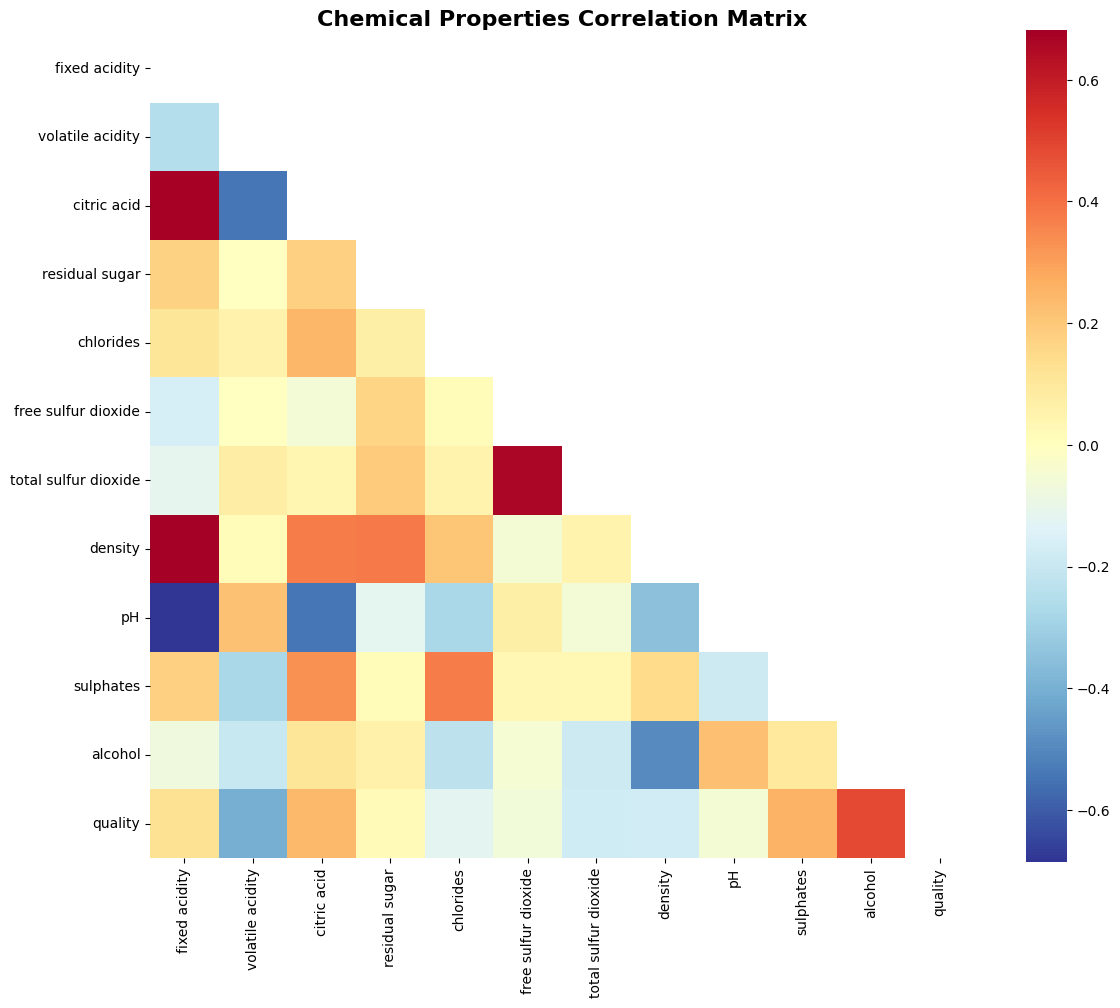


🎯 Strongest correlations with wine quality:
• alcohol: 0.485 (positively correlated)
• volatile acidity: -0.407 (negatively correlated)
• sulphates: 0.258 (positively correlated)
• citric acid: 0.241 (positively correlated)
• total sulfur dioxide: -0.183 (negatively correlated)

📊 Top positive influence: alcohol (0.485)
📊 Top negative influence: volatile acidity (-0.407)


In [6]:
# Analyze chemical properties
print("🧪 CHEMICAL PROPERTIES ANALYSIS")
print("="*45)

# Select chemical features (excluding quality and ID)
chemical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                    'pH', 'sulphates', 'alcohol']

# Create correlation matrix
correlation_matrix = df[chemical_features + ['quality']].corr()

# Visualize correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, mask=mask, fmt='.2f')
plt.title('Chemical Properties Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify strongest correlations with quality
quality_correlations = correlation_matrix['quality'].drop('quality').sort_values(key=abs, ascending=False)
print("\n🎯 Strongest correlations with wine quality:")
for feature, corr in quality_correlations.head(5).items():
    direction = "positively" if corr > 0 else "negatively"
    print(f"• {feature}: {corr:.3f} ({direction} correlated)")

print(f"\n📊 Top positive influence: {quality_correlations.idxmax()} ({quality_correlations.max():.3f})")
print(f"📊 Top negative influence: {quality_correlations.idxmin()} ({quality_correlations.min():.3f})")

🔬 CHEMICAL ANALYSIS BY QUALITY CATEGORY


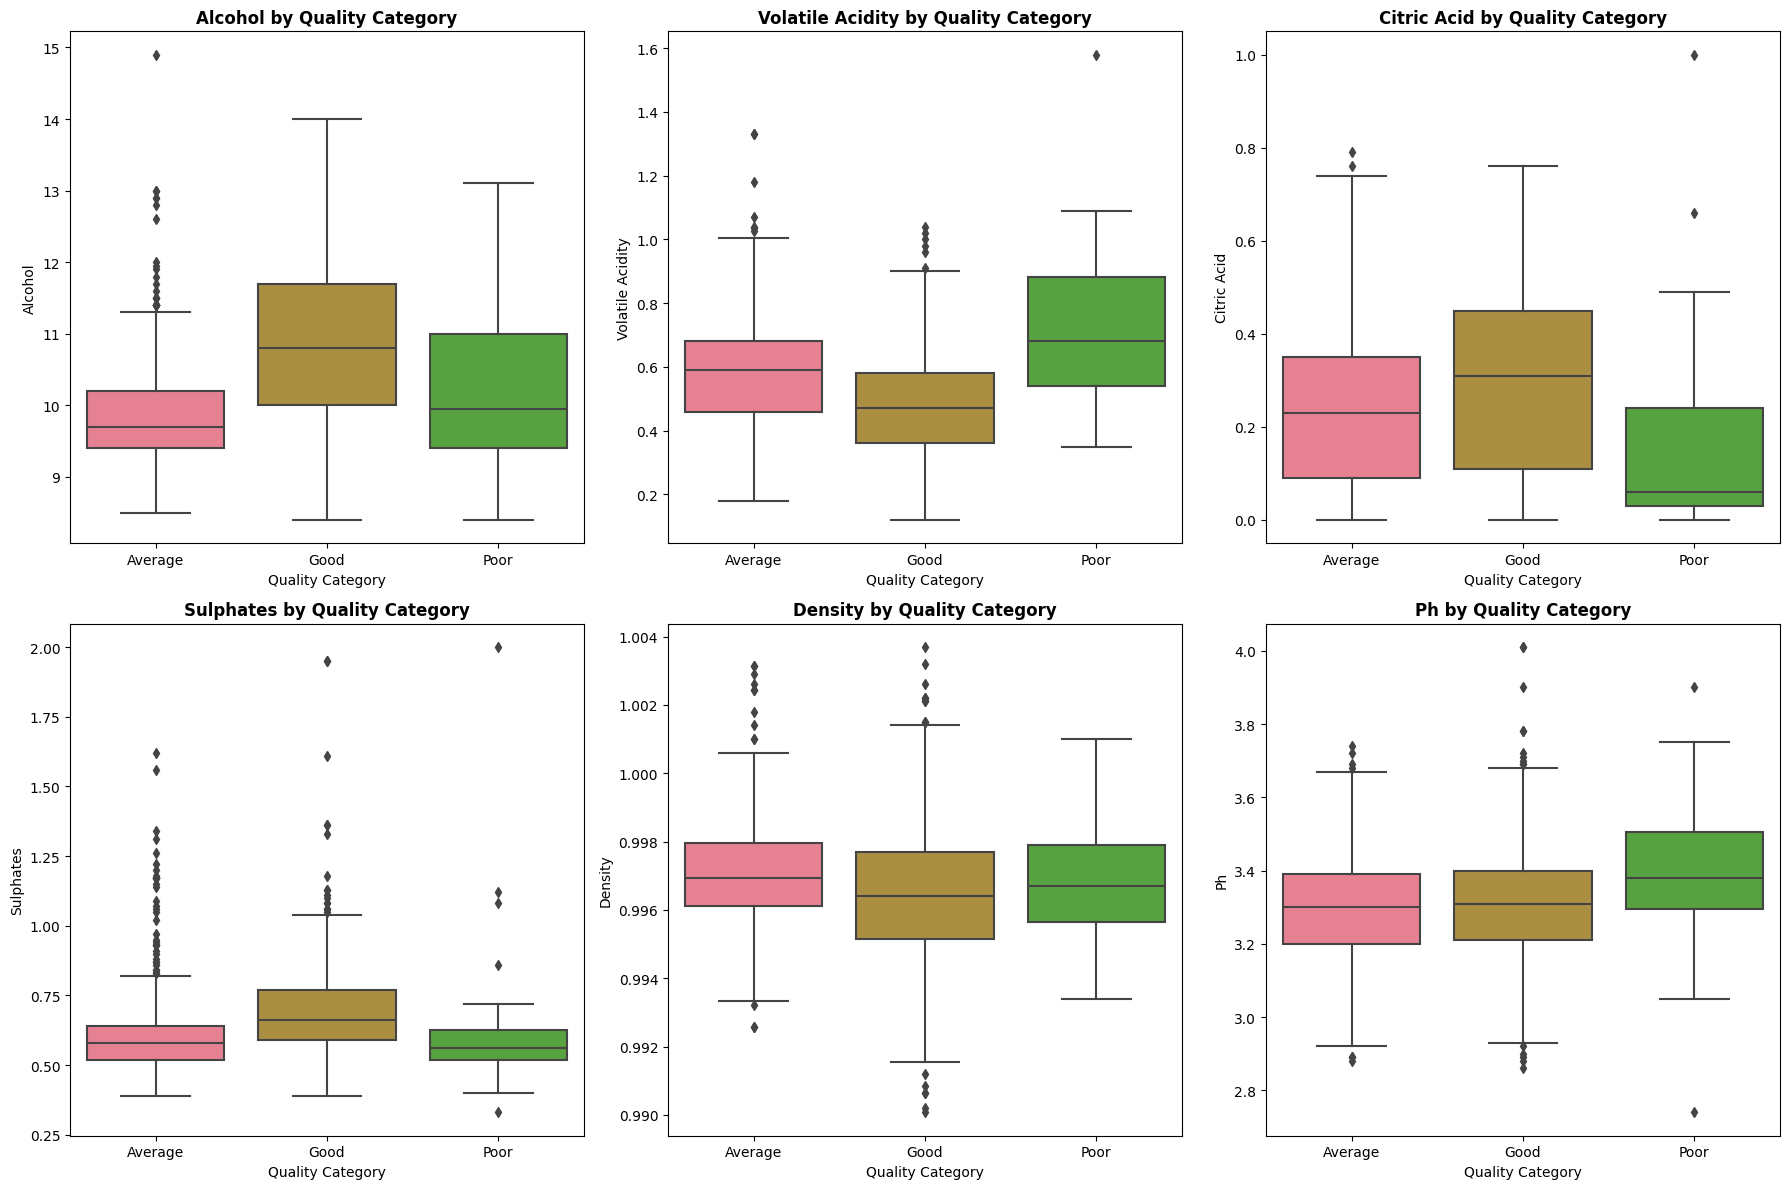


📊 Average chemical properties by quality category:
                  fixed acidity  volatile acidity  citric acid  \
quality_category                                                 
Average                   8.161             0.585        0.240   
Good                      8.453             0.477        0.296   
Poor                      7.908             0.730        0.173   

                  residual sugar  chlorides  free sulfur dioxide  \
quality_category                                                   
Average                    2.540      0.092               16.613   
Good                       2.523      0.083               14.952   
Poor                       2.582      0.096               13.821   

                  total sulfur dioxide  density     pH  sulphates  alcohol  
quality_category                                                            
Average                         55.299    0.997  3.302      0.613    9.902  
Good                            39.105    0.9

In [7]:
# Analyze chemical properties by quality category
print("🔬 CHEMICAL ANALYSIS BY QUALITY CATEGORY")
print("="*50)

# Create box plots for key chemical properties
key_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'density', 'pH']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    sns.boxplot(data=df, x='quality_category', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature.title()} by Quality Category', fontweight='bold')
    axes[i].set_xlabel('Quality Category')
    axes[i].set_ylabel(feature.title())

plt.tight_layout()
plt.show()

# Statistical analysis by quality category
print("\n📊 Average chemical properties by quality category:")
chemical_by_quality = df.groupby('quality_category')[chemical_features].mean()
print(chemical_by_quality.round(3))

print("\n💡 Key Chemical Insights:")
print("• Higher quality wines tend to have higher alcohol content")
print("• Lower volatile acidity is associated with better quality")
print("• Citric acid and sulphates show positive correlation with quality")
print("• Density patterns reflect alcohol and sugar relationships")

### Task 3: Feature Engineering and Data Preparation

**🎯 Goal**: Prepare the data for machine learning models

**📝 What to do**:
- Create new meaningful features from chemical properties
- Handle any data quality issues
- Prepare features for both regression and classification tasks
- Split data into training and testing sets
- Scale features appropriately

**🔧 Feature Engineering Ideas**:
- **Acidity Balance**: Combine different acidity measures
- **Alcohol-Sugar Ratio**: Balance between alcohol and residual sugar
- **Preservation Index**: Combine sulfur dioxide measures
- **Chemical Balance Score**: Overall chemical harmony indicator

Let's engineer some powerful features! ⚙️

In [8]:
# Feature Engineering for Wine Quality Prediction
print("⚙️ FEATURE ENGINEERING")
print("="*35)

# Create derived features that capture wine chemistry relationships
print("🔬 Creating chemical relationship features...")

# 1. Acidity Balance (total acidity profile)
df['total_acidity'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']

# 2. Alcohol-Sugar Balance
df['alcohol_sugar_ratio'] = df['alcohol'] / (df['residual sugar'] + 1)  # +1 to avoid division by zero

# 3. Sulfur Dioxide Efficiency (free vs total)
df['sulfur_efficiency'] = df['free sulfur dioxide'] / (df['total sulfur dioxide'] + 1)

# 4. Acidity-pH Balance (should be inversely related)
df['acidity_ph_balance'] = df['total_acidity'] * (1/df['pH'])

# 5. Chemical Quality Index (combining key positive indicators)
df['quality_index'] = (df['alcohol'] * df['citric acid'] * df['sulphates']) / (df['volatile acidity'] + 0.1)

# Display new features
new_features = ['total_acidity', 'alcohol_sugar_ratio', 'sulfur_efficiency', 
                'acidity_ph_balance', 'quality_index']

print("\n📊 New engineered features:")
for feature in new_features:
    print(f"• {feature}: {df[feature].describe().round(3)['mean']:.3f} (avg)")

# Combine original and new features
all_features = chemical_features + new_features
print(f"\n📋 Total features for modeling: {len(all_features)}")

# Prepare data for modeling
print("\n🎯 PREPARING DATA FOR MODELING")
print("="*40)

# Features (X) and targets (y)
X = df[all_features]
y_regression = df['quality']  # For regression (predicting numerical score)
y_classification = df['quality_category']  # For classification (predicting category)

# Encode categorical target for classification
label_encoder = LabelEncoder()
y_classification_encoded = label_encoder.fit_transform(y_classification)
class_names = label_encoder.classes_

print(f"📊 Feature matrix shape: {X.shape}")
print(f"🎯 Regression target: {y_regression.name} (range: {y_regression.min()}-{y_regression.max()})")
print(f"🎯 Classification target: {len(class_names)} classes: {list(class_names)}")

# Split data into training and testing sets
X_train, X_test, y_reg_train, y_reg_test = train_test_split(
    X, y_regression, test_size=0.2, random_state=42, stratify=df['quality_category']
)

X_train_cls, X_test_cls, y_cls_train, y_cls_test = train_test_split(
    X, y_classification_encoded, test_size=0.2, random_state=42, stratify=y_classification_encoded
)

print(f"\n📚 Training set size: {len(X_train)} wines")
print(f"🧪 Testing set size: {len(X_test)} wines")

# Scale features (important for many ML algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Feature engineering and data preparation completed!")
print("🎯 Ready for model training!")

⚙️ FEATURE ENGINEERING
🔬 Creating chemical relationship features...

📊 New engineered features:
• total_acidity: 9.111 (avg)
• alcohol_sugar_ratio: 3.175 (avg)
• sulfur_efficiency: 0.367 (avg)
• acidity_ph_balance: 2.776 (avg)
• quality_index: 3.886 (avg)

📋 Total features for modeling: 16

🎯 PREPARING DATA FOR MODELING
📊 Feature matrix shape: (1143, 16)
🎯 Regression target: quality (range: 3-8)
🎯 Classification target: 3 classes: ['Average', 'Good', 'Poor']

📚 Training set size: 914 wines
🧪 Testing set size: 229 wines

✅ Feature engineering and data preparation completed!
🎯 Ready for model training!


### Task 4: Build Regression Models (Predicting Quality Scores)

**🎯 Goal**: Build models to predict numerical wine quality scores (4-6 scale)

**📝 What to do**:
- Train multiple regression algorithms
- Compare model performance using appropriate metrics
- Understand which chemical properties are most important
- Interpret model predictions and feature importance

**🤖 Models to Compare**:
- **Linear Regression**: Simple, interpretable baseline
- **Random Forest**: Captures non-linear relationships and feature interactions

**📊 Evaluation Metrics**:
- **RMSE**: Root Mean Square Error (lower is better)
- **R²**: R-squared score (higher is better, max = 1.0)
- **Feature Importance**: Which chemicals matter most

Let's build our regression models! 📈

📈 WINE QUALITY REGRESSION MODELS
🔍 Training Linear Regression...
📊 Linear Regression Results:
   RMSE: 0.641
   R² Score: 0.418

🌲 Training Random Forest Regressor...
📊 Random Forest Results:
   RMSE: 0.579
   R² Score: 0.526

🏆 MODEL COMPARISON
Linear Regression  - RMSE: 0.641, R²: 0.418
Random Forest      - RMSE: 0.579, R²: 0.526

🏅 Best Regression Model: Random Forest


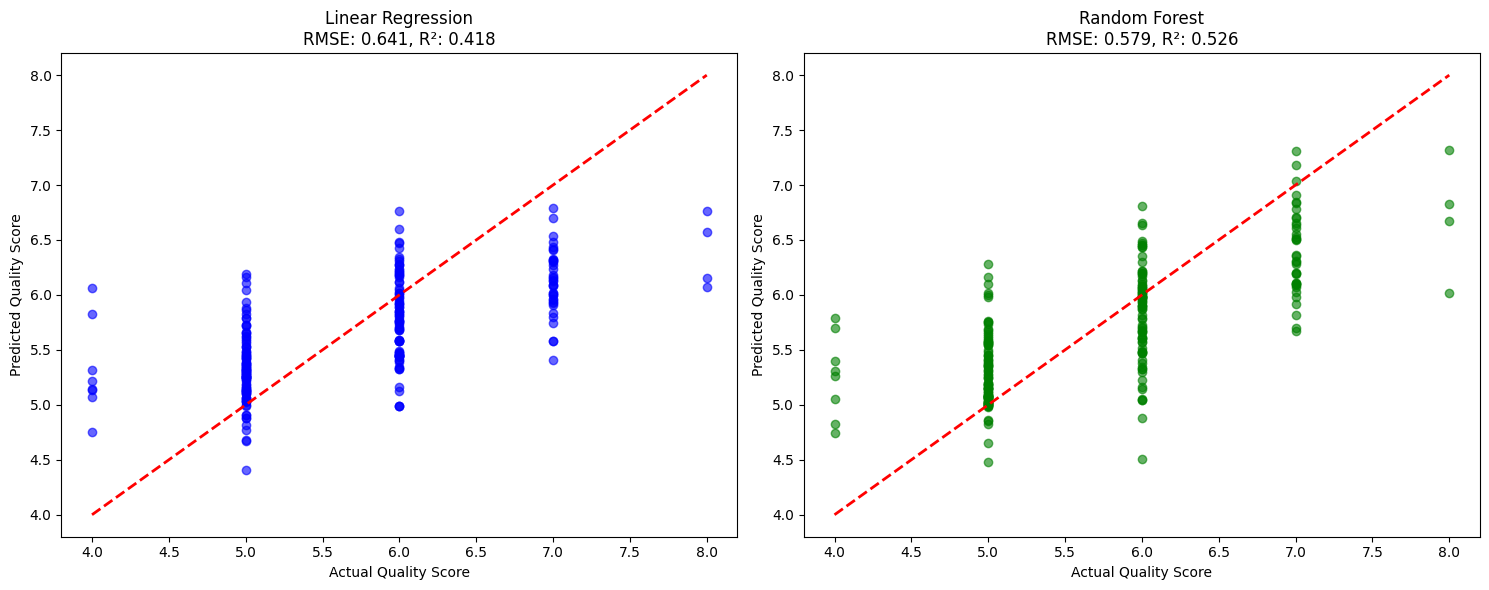

In [9]:
# Build and evaluate regression models
print("📈 WINE QUALITY REGRESSION MODELS")
print("="*45)

# 1. Linear Regression Model
print("🔍 Training Linear Regression...")
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_reg_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate Linear Regression
rmse_linear = np.sqrt(mean_squared_error(y_reg_test, y_pred_linear))
r2_linear = r2_score(y_reg_test, y_pred_linear)

print(f"📊 Linear Regression Results:")
print(f"   RMSE: {rmse_linear:.3f}")
print(f"   R² Score: {r2_linear:.3f}")

# 2. Random Forest Regression Model
print("\n🌲 Training Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_reg_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_reg_test, y_pred_rf))
r2_rf = r2_score(y_reg_test, y_pred_rf)

print(f"📊 Random Forest Results:")
print(f"   RMSE: {rmse_rf:.3f}")
print(f"   R² Score: {r2_rf:.3f}")

# Model Comparison
print(f"\n🏆 MODEL COMPARISON")
print("="*30)
print(f"Linear Regression  - RMSE: {rmse_linear:.3f}, R²: {r2_linear:.3f}")
print(f"Random Forest      - RMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}")

best_model = "Random Forest" if rmse_rf < rmse_linear else "Linear Regression"
print(f"\n🏅 Best Regression Model: {best_model}")

# Visualize predictions vs actual
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Linear Regression predictions
ax1.scatter(y_reg_test, y_pred_linear, alpha=0.6, color='blue')
ax1.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Quality Score')
ax1.set_ylabel('Predicted Quality Score')
ax1.set_title(f'Linear Regression\nRMSE: {rmse_linear:.3f}, R²: {r2_linear:.3f}')

# Random Forest predictions
ax2.scatter(y_reg_test, y_pred_rf, alpha=0.6, color='green')
ax2.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Quality Score')
ax2.set_ylabel('Predicted Quality Score')
ax2.set_title(f'Random Forest\nRMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}')

plt.tight_layout()
plt.show()